In [1]:
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import mnist
from tensorflow.keras import *
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import sys
import os
from keras.utils.vis_utils import plot_model

sys.path.insert(1, os.path.join(sys.path[0], '../../..'))

from utils import *

%matplotlib inline
%config Completer.use_jedi = False

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

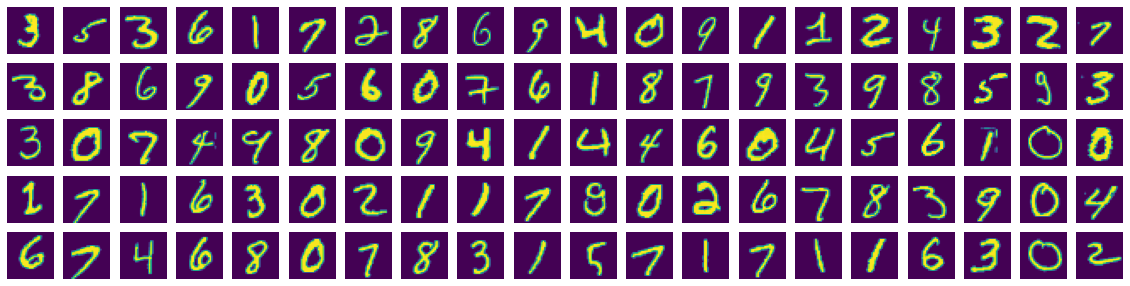

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
show_dataset(x_train)

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
num_classes = 10 

mean = np.mean(x_train,axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))

x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

y_train = utils.to_categorical(y_train, num_classes) 
y_test = utils.to_categorical(y_test, num_classes) 

In [5]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
def build_model(weight_decay= 0.00005, x_shape=[28,28,1], num_classes=10):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(128, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

   

    model.add(Flatten())
    model.add(Dense(128,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())

    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [8]:
model = build_model()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
235/235 [==============================] - 9s 24ms/step - loss: 0.3961 - accuracy: 0.8883 - val_loss: 0.4384 - val_accuracy: 0.8874
Epoch 2/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1264 - accuracy: 0.9701 - val_loss: 0.0681 - val_accuracy: 0.9882
Epoch 3/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1010 - accuracy: 0.9787 - val_loss: 0.0555 - val_accuracy: 0.9919
Epoch 4/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0880 - accuracy: 0.9819 - val_loss: 0.0513 - val_accuracy: 0.9940
Epoch 5/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0801 - accuracy: 0.9856 - val_loss: 0.0515 - val_accuracy: 0.9926
Epoch 6/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0746 - accuracy: 0.9867 - val_loss: 0.0526 - val_accuracy: 0.9930
Epoch 7/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0708 - accuracy: 0.9874 - val_loss: 0.0496 - val_accuracy:

235/235 [==============================] - 5s 21ms/step - loss: 0.0519 - accuracy: 0.9952 - val_loss: 0.0533 - val_accuracy: 0.9955
Epoch 58/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0470 - accuracy: 0.9963 - val_loss: 0.0543 - val_accuracy: 0.9941
Epoch 59/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0501 - accuracy: 0.9954 - val_loss: 0.0535 - val_accuracy: 0.9948
Epoch 60/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0505 - accuracy: 0.9955 - val_loss: 0.0553 - val_accuracy: 0.9947
Epoch 61/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0496 - accuracy: 0.9954 - val_loss: 0.0535 - val_accuracy: 0.9946
Epoch 62/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0490 - accuracy: 0.9956 - val_loss: 0.0563 - val_accuracy: 0.9937
Epoch 63/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0488 - accuracy: 0.9958 - val_loss: 0.0510 - val_accuracy: 0.994

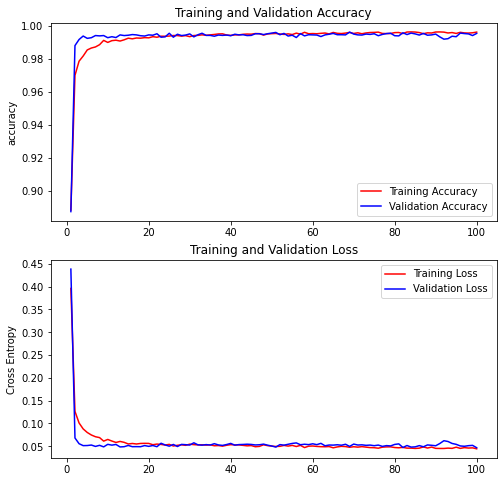

In [12]:
print_history_chart(history)

In [13]:
pprint(full_evaluate(model, x_test, y_test))

{'accuracy_score': 0.9956,
 'f1_score_macro': 0.9955861598397971,
 'f1_score_weighted': 0.9956003854113596}


In [14]:
model.save('vanilla_mnist.h5')

In [15]:
model = tf.keras.models.load_model("vanilla_mnist.h5")

In [16]:
pprint(full_evaluate(model, x_test, y_test))

{'accuracy_score': 0.9956,
 'f1_score_macro': 0.9955861598397971,
 'f1_score_weighted': 0.9956003854113596}


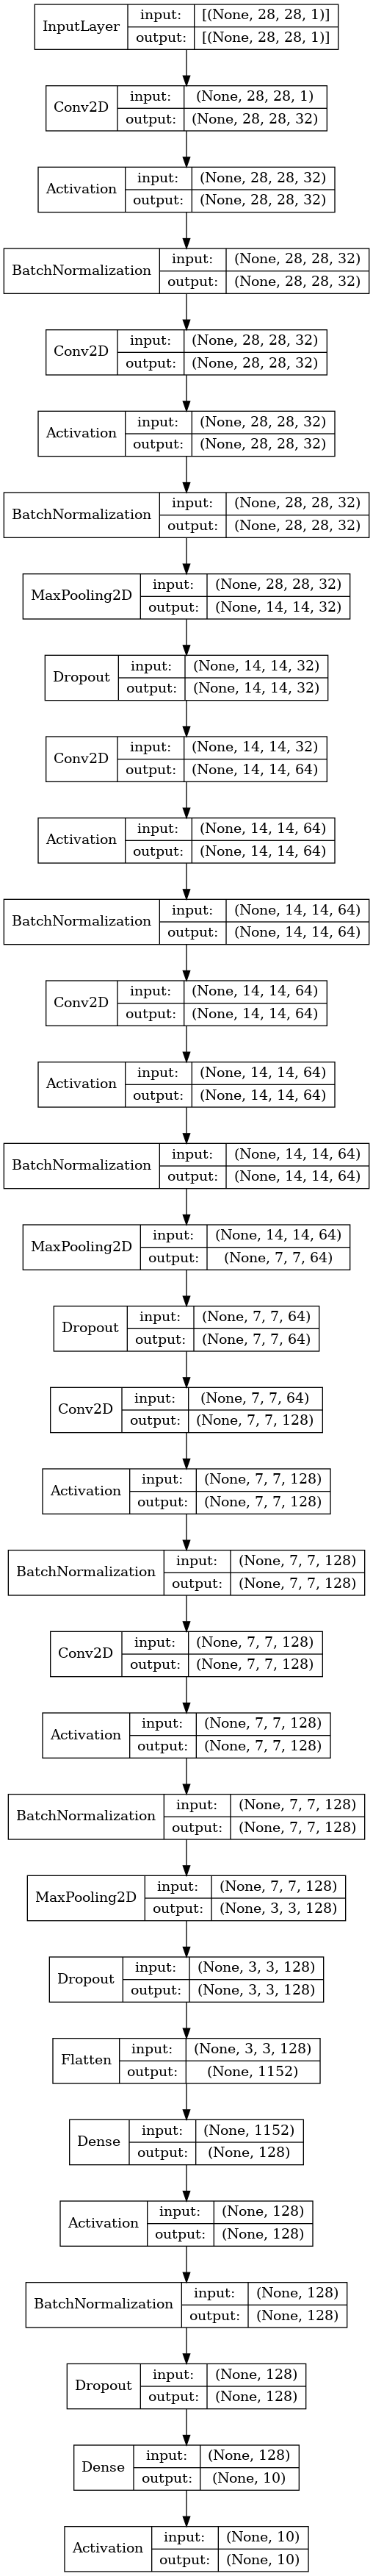

In [17]:
plot_model(model, show_shapes=True, show_layer_names=False)